MainProcess


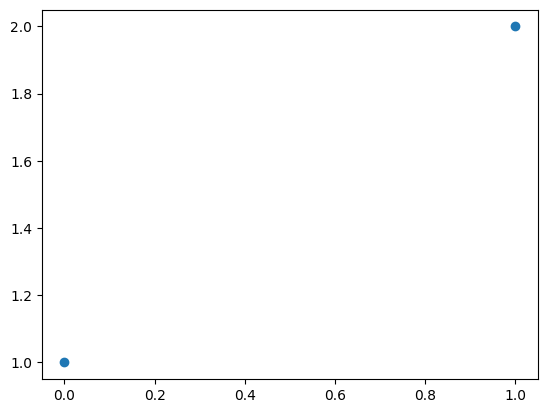

In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
import flg_preprocess
import os
import flg_model
fls.profiling=False
plt.scatter([0,1],[1,2])

In [2]:
#Prepare datasets
#fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

In [13]:
files = glob.glob(fls.result_dir + '/many_full_res/Baseline_9_*')
assert len(files)==1
loaded_data = fls.dill_load(files[0])
print(loaded_data.modifier_values)
model = loaded_data.trained_model
model.step1Labels.trained_model = model.step1Labels.trained_model[0:1]
model.step1Labels.n_ensemble=1
model.run_in_parallel=False

{'seed': 9, 'n_ensemble': 4, 'concentration': 1, 'extra_data': True, 'trust_neg': 2, 'trust_extra': 4, 'negative_label_threshold': 0.6301574075025781, 'target_voxel_spacing': 23.887670414600894, 'blur_xy': 36.48223888810696, 'blur_z': 15.0, 'scale_moving_std': True, 'scale_moving_average_size': 2573, 'scale_moving_std_size_fac': 1.4591188145243812, 'blur_xy_moving_std': 1.5952640680558328, 'clip_value': 2.9372480001295087, 'scale_percentile_value': 2.969888653954576, 'img_size': 640, 'box_size': 15, 'n_epochs': 54, 'use_best_epoch': False, 'lr0': 0.0013559652968235714, 'cos_lr': True, 'dropout': 0.09833022442861755, 'weight_decay': 0.00025780174498913656, 'box': 6.468667966063088, 'model_name': 'yolov8s', 'use_pretrained_weights': False, 'mosaic_mode': 0.2991810731982467, 'translate': 0.1, 'scale': 0.3479115269119004, 'mixup': 0.15651818306562632, 'erasing': 0.3950962987578307, 'hsv_h': 0.014793578239203577, 'hsv_s': 0.618003796897673, 'hsv_v': 0.3651240207135672, 'fliplr': 0.5, 'flipu

In [8]:
data=fls.load_all_train_data()
data2 = []
for d in data:
    if d.name in ['tomo_08bf73', 'tomo_24a095', 'tomo_37c426', 'tomo_3a0914', 'tomo_3a8480', 'tomo_3b8291', 'tomo_5b359d', 'tomo_648adf', 'tomo_67ff4e', 'tomo_692081',
         'tomo_6b1fd3', 'tomo_774aae', 'tomo_9f918e', 'tomo_ac4f0d', 'tomo_b18127', 'tomo_d8c917']:
        data2.append(d)
        print('hi')
        print(d.labels)
print(len(data2))

hi
Empty DataFrame
Columns: [z, y, x]
Index: []
hi
Empty DataFrame
Columns: [z, y, x]
Index: []
hi
Empty DataFrame
Columns: [z, y, x]
Index: []
hi
Empty DataFrame
Columns: [z, y, x]
Index: []
hi
     z    y    x
0  223  460  896
1  212  482  872
hi
Empty DataFrame
Columns: [z, y, x]
Index: []
hi
Empty DataFrame
Columns: [z, y, x]
Index: []
hi
Empty DataFrame
Columns: [z, y, x]
Index: []
hi
Empty DataFrame
Columns: [z, y, x]
Index: []
hi
Empty DataFrame
Columns: [z, y, x]
Index: []
hi
Empty DataFrame
Columns: [z, y, x]
Index: []
hi
Empty DataFrame
Columns: [z, y, x]
Index: []
hi
Empty DataFrame
Columns: [z, y, x]
Index: []
hi
Empty DataFrame
Columns: [z, y, x]
Index: []
hi
Empty DataFrame
Columns: [z, y, x]
Index: []
hi
Empty DataFrame
Columns: [z, y, x]
Index: []
16


In [14]:
inferred_data2=model.infer(data2)

C:\Users\jeroe\anaconda3\envs\jupyterlab-debugger2\lib\site-packages\cupyx\jit\_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


Clearing cupy
YOLOv8s summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
Processing tomogram tomo_08bf73 (1/1)
Processing 800 out of 800 slices (CONCENTRATION=1)
FINAL
     z    y    x  confidence  \
0  339   85  481    0.003884   
1  356  117  491    0.001573   
2  356   86  500    0.001139   
3  354   85  427    0.000943   
4  356  118  539    0.000903   

                                          all_scores  
0     [0, 0, 0, 0, 0, 0.042724609375, 0, 0, 0, 0, 0]  
1  [0, 0, 0, 0, 0, 0.017303466796875, 0, 0, 0, 0, 0]  
2  [0, 0, 0, 0, 0, 0.0125274658203125, 0, 0, 0, 0...  
3  [0, 0, 0, 0, 0, 0.01036834716796875, 0, 0, 0, ...  
4  [0, 0, 0, 0, 0, 0.0099334716796875, 0, 0, 0, 0...  

Clearing pytorch
Clearing cupy
Processing tomogram tomo_24a095 (1/1)
Processing 800 out of 800 slices (CONCENTRATION=1)
FINAL
      z    y    x  confidence  \
0   366  867  915    0.001853   
1   729  711  252    0.004048   
2    30  710  252    0.003296   
3   730  226  237    0.00

In [15]:
for d2,id2 in zip(data2,inferred_data2):
    print('XXX')
    print(d2.labels)
    print(id2.labels)

XXX
Empty DataFrame
Columns: [z, y, x]
Index: []
   index    z   y    x  confidence  \
0      0  339  85  481    0.003884   

                                       all_scores     value  
0  [0, 0, 0, 0, 0, 0.042724609375, 0, 0, 0, 0, 0]  0.003884  
XXX
Empty DataFrame
Columns: [z, y, x]
Index: []
   index    z    y    x  confidence  \
0      1  729  711  252    0.004048   

                                          all_scores     value  
0  [0.00394439697265625, 0.00395965576171875, 0.0...  0.004048  
XXX
Empty DataFrame
Columns: [z, y, x]
Index: []
Empty DataFrame
Columns: [index, z, y, x, confidence, all_scores, value]
Index: []
XXX
Empty DataFrame
Columns: [z, y, x]
Index: []
Empty DataFrame
Columns: [index, z, y, x, confidence, all_scores, value]
Index: []
XXX
     z    y    x
0  223  460  896
1  212  482  872
   index    z    y    x  confidence  \
0      0  205  342  329    0.060253   

                                          all_scores     value  
0  [0, 0, 0.341552734375, 0, 